# Machine Learning - SVM

* SVM aplicado na classificação de flores e na classificação de músicas do Spotify.
* O SVM será utilizado para criação de classificador que identifica possíveis músicas que um usuário poderia gostar.
* Iremos treinar o algoritmo, validar o modelo e fazer tunning dos parâmetros do SVM.

## Scripts e Base de dados

- A base de dados de **músicas do Spotify** bem como o **notebook com os scripts** dessa aula podem ser baixados em nosso Github, [aqui](https://github.com/minerandodados/mdrepo/blob/master/petr4_1_2010_11_2017.csv)
- Base de dasos Iris, para conhecer clique [aqui](https://archive.ics.uci.edu/ml/datasets/iris)

**Bibliotecas utilizadas**

In [1]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
#%matplotlib inline

** Importando dataset Iris**

In [2]:
from sklearn import datasets

In [3]:
# Carregando o dataset para o array chamado iris
iris = datasets.load_iris()

In [4]:
type(iris)

sklearn.utils._bunch.Bunch

In [5]:
# Visualizando o nome das features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# Nome das Classes
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# Separando dados de treino.
treino = iris.data

In [8]:
# Separando dados de classes.
classes = iris.target

In [9]:
# Visualizando a forma do array dos dados de treino.
# Formato (linhas,colunas).
treino.shape

(150, 4)

In [10]:
# Visualizando os dados de treino.
treino[:20]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

In [11]:
# Visualizando a forma do array de classes.
classes.shape

(150,)

In [12]:
# Visualizando os dados únicos do array de classes.
set(classes)

{np.int64(0), np.int64(1), np.int64(2)}

In [13]:
# Visualizando os dados de classes.
classes[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Visualização de dados

* **Visualizando a disperssão de dados quanto a classe**

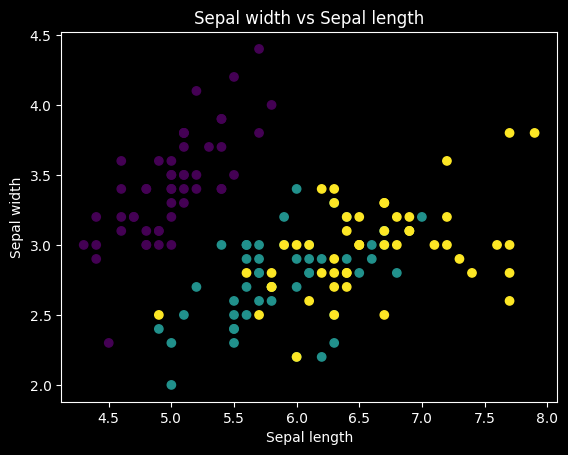

In [14]:
# Plota gráfico de disperssão dos dados com relação a classe.
# Disperssão dos dados de Sepal width e Sepal Length com as classes(0,1,2)
#%matplotlib notebook
#from matplotlib import style
#style.use("ggplot")
#sepal length vs sepal width
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal width vs Sepal length')
plt.scatter(treino[:,0],treino[:,1], c=classes)


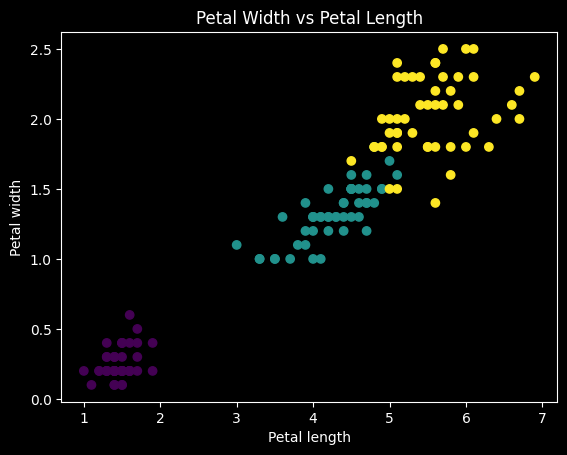

In [15]:
# Plota gráfico de disperssão dos dados com relação a classe.
# Disperssão dos dados de Petal width e Petal Length com as classes(0,1,2)
#%matplotlib notebook
#style.use("ggplot")
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Width vs Petal Length')
plt.scatter(treino[:,2], treino[:,3], c=classes)
plt.show()

# Aplicando o SVM

* Vamos agora aplicar o SVM para classificar flores usando a base de dados Iris.

In [16]:
# Usaremos 80% dos dados para treino e 20% para teste.
# Visualizando o tamanho dos dados de treino.
len(treino[:-30]), len(classes[:-30])

(120, 120)

In [17]:
# Visualizando os dados de treino
treino[:-30]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
# Visualiando as classes correspondentes
classes[:-30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
# Treinando o algoritmo de SVM.
clf = svm.SVC().fit(treino[:-30],classes[:-30])

In [20]:
# Objeto clf
clf

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [21]:
# Cria um array com os dados de teste
# 20% dos dados que não foram testados
teste = treino[-30:]

In [22]:
# Visualizando os dados de teste
teste

array([[6.9, 3.2, 5.7, 2.3],
       [5.6, 2.8, 4.9, 2. ],
       [7.7, 2.8, 6.7, 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [6.7, 3.3, 5.7, 2.1],
       [7.2, 3.2, 6. , 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [7.2, 3. , 5.8, 1.6],
       [7.4, 2.8, 6.1, 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [6.3, 2.8, 5.1, 1.5],
       [6.1, 2.6, 5.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.4, 3.1, 5.5, 1.8],
       [6. , 3. , 4.8, 1.8],
       [6.9, 3.1, 5.4, 2.1],
       [6.7, 3.1, 5.6, 2.4],
       [6.9, 3.1, 5.1, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [6.8, 3.2, 5.9, 2.3],
       [6.7, 3.3, 5.7, 2.5],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [23]:
# Predizendo valores com a porção de dados de teste
clf.predict(teste)

array([2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 1])

In [24]:
# Cria um array com as classes dos dados de teste.
classes_teste = classes[-30:]

In [25]:
# Visualizando as classes de teste
classes_teste

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

## Visualizando os Resultados de Classificação

In [26]:
# Gráfico de disperssão entre as colunas Sepal Length , Sepatl width e a classe.
# Os pontos roxos são pontos no qual o classificador errou.
%matplotlib notebook
from matplotlib import style
style.use("ggplot")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal width vs Sepal length')
plt.scatter(treino[-30:,0],treino[-30:,1], c=clf.predict(teste))

<IPython.core.display.Javascript object>

In [27]:
# Gráfico de disperssão entre as colunas Petal Length , Petal width e a classe.
# Os pontos roxos são pontos no qual o classificador errou.
%matplotlib notebook
from matplotlib import style
style.use("ggplot")
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Width vs Length')
plt.scatter(treino[-30:,2], treino[-30:,3], c=clf.predict(teste))

<IPython.core.display.Javascript object>

In [28]:
# Gráfico de instâncias e predição destas.
%matplotlib notebook
from matplotlib import style
style.use("ggplot")
plt.xlabel('Amostras')
plt.ylabel('Classes')
plt.title('Classificacao do SVM')
plt.scatter(range(len(classes_teste)),classes_teste,c=clf.predict(teste))

<IPython.core.display.Javascript object>

# Matriz de Confusão

In [29]:
print (pd.crosstab(classes_teste,clf.predict(teste),rownames=['Real'], colnames=['Predito'], margins=True),'')

Predito  1   2  All
Real               
2        9  21   30
All      9  21   30 


# Cross Validation

In [30]:
# Função que retorna a acurácia após fazer um validação cruzada (cross validation)
def Acuracia(clf,X,y):
    resultados = cross_val_predict(clf, X, y, cv=10)
    return metrics.accuracy_score(y,resultados)

In [31]:
Acuracia(clf,treino,classes)

0.9733333333333334

# Métricas de Avaliação

In [32]:
# Imprime as métricas: 'precisão, revocação e Medida F1.
resultados = cross_val_predict(clf,treino, classes, cv=10)
valor_classes = [0,1,2]
print (metrics.classification_report(classes,resultados,valor_classes))

TypeError: too many positional arguments

# Base de dados de músicas do Spotify

In [0]:
# Informações das Features da Base de dados.
# https://developer.spotify.com/web-api/get-audio-features/

In [0]:
dataset = pd.read_csv('data.csv', sep=',')

In [0]:
dataset.head()

# Análise de Dados

In [0]:
#Checando valores Missing
dataset.isnull().sum()

In [0]:
# Resumo Estatístico da base
# Somente dados numéricos
dataset.describe()

In [0]:
 # lista estilos disponíveis do Matplotlib
plt.style.available

In [0]:
%matplotlib notebook
from matplotlib import style
style.use("seaborn-colorblind")
dataset.plot(x='acousticness', y='danceability', c='target', kind='scatter', colormap='Accent_r')

In [0]:
%matplotlib notebook
from matplotlib import style
style.use("seaborn-colorblind")
dataset.plot(x='tempo', y='valence', c='target', kind='scatter' , colormap='Accent_r')

In [0]:
%matplotlib notebook
from matplotlib import style
style.use("seaborn-colorblind")
dataset.plot(x='tempo', y='speechiness', c='target', kind='scatter' , colormap='Accent')

In [0]:
%matplotlib notebook
from matplotlib import style
style.use("seaborn-colorblind")
dataset.plot(x='danceability', y='energy', c='target', kind='scatter' , colormap='Reds')

# Separa a classe dos dados

In [0]:
classes = dataset['target']
dataset.drop('target', axis=1, inplace=True)

In [0]:
dataset.head(15)

# Pre-processamento de dados

In [0]:
def remove_features(lista_features):
    for i in lista_features:
        dataset.drop(i, axis=1, inplace=True)
    return 0

In [0]:
# Remove features
remove_features(['id','song_title'])

In [0]:
# Visualizando o dataset
dataset.artist.head(10)

In [0]:
# Visualizando o dataset
dataset.info()

# Label Encoder

* Técnica para codificar valores categoricos em numéricos
* Um exemplo seria: a lista de cores: _(‘branco’,’preto’,’amarelo’,’vermelho’,'branco')_
* Após aplicar o LabelEncoder esta seria algo como __(1,2,3,4,1)__

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
enc = LabelEncoder()

In [0]:
inteiros = enc.fit_transform(dataset['artist'])

In [0]:
# Visualizando valores únicos.
set(inteiros)

In [0]:
# Cria uma nova coluna chamada 'artist_inteiros'
dataset['artist_inteiros'] = inteiros

In [0]:
dataset.head()

In [0]:
remove_features(['artist'])

In [0]:
# Visualizando o Dataset alterado.
dataset.head(20)

# One Hot Encoding

* Técnica usada para codificar valores categóricos em númericos.
* Cria uma matriz de presença.
* Resolve o problema __ordenação__ nos dados gerados pelo LabelEncoder.

In [0]:
# Apaque a coluna 'Artist'
remove_features(['artist'])


In [0]:
# Importa o pacote OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [0]:
# Instancia um objeto do tipo OnehotEncoder
ohe = OneHotEncoder()

In [0]:
dataset.values

In [0]:
# Transforma em arrayn numpy o dataset.
dataset_array = dataset.values

In [0]:
# Pega o numero de linhas.
num_rows = dataset_array.shape[0]

In [0]:
# Visualiza coluna de inteiros
dataset_array[:][:,13]


In [0]:
# Transforma a matriz em uma dimensão
inteiros = inteiros.reshape(len(inteiros),1)

In [0]:
# Criar as novas features a partir da matriz de presença
novas_features = ohe.fit_transform(inteiros)

In [0]:
# Imprime as novas features
novas_features

In [0]:
# Concatena as novas features ao array
dataset_array = np.concatenate([dataset_array, novas_features.toarray()], axis=1)

In [0]:
# Visualizando a quantidade de linhas e colunas da base
dataset_array.shape

In [0]:
# Transforma em dataframe e visualiza as colunas
dataf = pd.DataFrame(dataset_array)

In [0]:
dataf.head(100)

# Pandas Get_dummies

* Cria uma matriz de presença como feito com o OHE.

In [0]:
dataset.head()

In [0]:
# Aplicando o get_dummies nos dados.
dataset = pd.get_dummies(dataset, columns=['artist'], prefix=['artist'])

In [0]:
# Visualizando 'features' geradas.
dataset.columns

In [0]:
len(dataset.columns)

In [0]:
# Visualizando as colunas
dataset.dtypes

In [0]:
# checando missing values
dataset.isnull().sum()

In [0]:
# coluna artist
len(dataset.columns)

# Pipeline

In [0]:
# Importe as bibliotecas de Pipelines e Pré-processadores
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [0]:
# Treinando o algoritmo de SVM.
clf = svm.SVC().fit(dataset,classes)

In [0]:
clf

In [0]:
Acuracia(clf,dataset,classes)

In [0]:
# Criando um pipeline
pip_1 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC())
])

In [0]:
# Imprimindo Etapas do Pipeline
pip_1.steps

In [0]:
# Chama a função acuracia passando os dados de musicas e as classes
# Usando o pipeline pip_1
Acuracia(pip_1,dataset,classes)

In [0]:
# Criando vários Pipelines
pip_2 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', svm.SVC())
])

pip_3 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='rbf'))
])

pip_4 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='poly'))
])

pip_5 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='linear'))
])

In [0]:
# Chama a função acuracia passando os dados de musicas e as classes
# Usando o pipeline pip_2
Acuracia(pip_2,dataset,classes)

# Teste com apenas labelEncoder nos dados

In [0]:
# Teste com apenas LabelEncoder na coluna 'artist' usando o pipeline 'pip_1'
Acuracia(pip_1,dataset,classes)

In [0]:
# # Teste com apenas LabelEncoder na coluna 'artist' usando o pipeline 'pip_1'
Acuracia(pip_2,dataset,classes)

# Testando o Desempenho dos Kernels

In [0]:
# Testando o Kernel RBF
Acuracia(pip_3,dataset,classes)

In [0]:
# Teste de kernel poly
Acuracia(pip_4,dataset,classes)

In [0]:
# Teste de Kernel linear
Acuracia(pip_5,dataset,classes)

## Teste de Overfitting

In [0]:
# Utiliza a função train_test_split para separar conjunto de treino e teste em 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, classes, test_size=0.2, random_state=123)

In [0]:
# Scala os dados de treino e teste.
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler2 = StandardScaler().fit(X_test)
X_test = scaler2.transform(X_test)

In [0]:
# Treina o algoritmo
clf.fit(X_train, y_train)

In [0]:
# Resultados de predição.
y_pred  = clf.predict(X_test)

In [0]:
# Imprime a acurácia.
metrics.accuracy_score(y_test,y_pred)

In [0]:
# Testando a classificação com o próprio teste

In [0]:
# Resultados de predição
y_pred  = clf.predict(X_train)

In [0]:
# Imprime a Acurácia.
metrics.accuracy_score(y_train,y_pred)


# Tunning

In [0]:
# Importa o utilitário GridSearchCV
from sklearn.model_selection import GridSearchCV

In [0]:
# Lista de Valores de C
lista_C = [0.001, 0.01, 0.1, 1, 10, 100]

# Lista de Valores de gamma
lista_gamma = [0.001, 0.01, 0.1, 1, 10, 100]

In [0]:
# Define um dicionário que recebe as listas de parâmetros e valores.
parametros_grid = dict(clf__C=lista_C, clf__gamma=lista_gamma)

In [0]:
parametros_grid

In [0]:
# Objeto Grid recebe parâmetros de Pipeline, e configurações de cross validation
grid = GridSearchCV(pip_3, parametros_grid, cv=10, scoring='accuracy')

In [0]:
# Aplica o gridsearch passando os dados de treino e classes.
grid.fit(dataset,classes)

# Resultados de Grid

In [0]:
# Imprime os scores por combinações
grid.grid_scores_

In [0]:
# Imprime os melhores parâmetros
grid.best_params_

In [0]:
grid.best_score_